## 依赖库导入

In [69]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import mean
from numpy import cov
from PIL import Image
from matplotlib.pyplot import *
import os
import  random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 数据导入

In [70]:
train_path = './data/train/'
train_images = []
train_list = os.listdir(train_path)
train_list.sort(key=lambda x: int(x.split('.')[0]))
for f in train_list:
    train_images.append(np.asarray(Image.open(train_path +'/'+f)).flatten())
x_train = np.array(train_images).astype('int32')
x_train.shape

(800, 196608)

In [71]:
test_path = './data/test/'
test_images = []
test_list = os.listdir(test_path)
test_list.sort(key=lambda x: int(x.split('.')[0]))
for f in test_list:
    test_images.append(np.asarray(Image.open(test_path +'/'+f)).flatten())
x_test = np.array(test_images).astype('int32')
x_test.shape

(200, 196608)

In [72]:
y_train = np.array(pd.read_csv('./data/train_label.txt', names=['性别(男1女0)', ])).flatten()
y_test = np.array(pd.read_csv('./data/test_label.txt', names=['性别(男1女0)', ])).flatten()
print('训练集大小为:', y_train.shape)
print('测试集大小为:', y_test.shape)

训练集大小为: (800,)
测试集大小为: (200,)


## 随机查看6张自己的训练集是否标记正确（男性标签为1，女性为0）

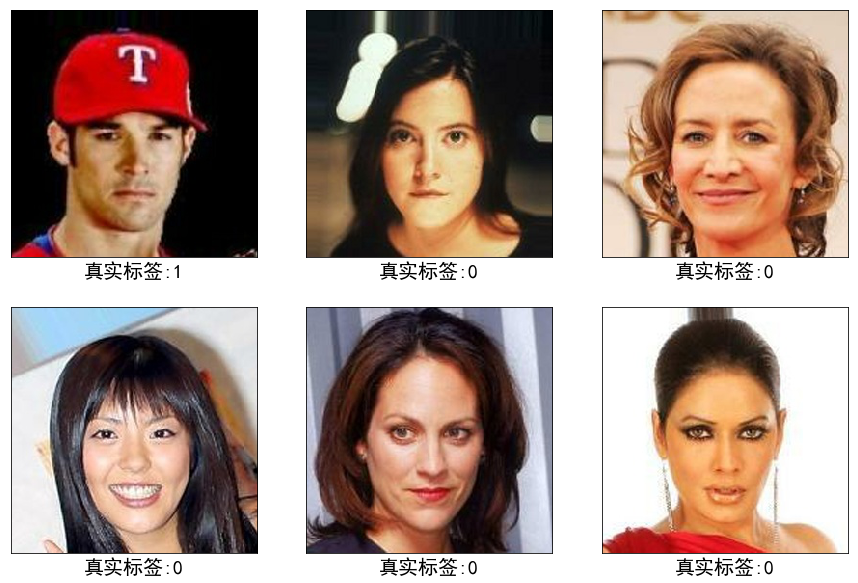

In [29]:
list_temp = list(range(1, 800+1))
list_view = random.sample(list_temp,10)
X_plot = x_train.reshape(800,256,256,3)
temp = 0
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_plot[list_view[temp]])
    plt.xlabel('真实标签:{}'.format(y_train[list_view[temp]]),fontsize=20)
    temp += 1

## 随机查看6张自己的测试集是否标记正确（男性标签为1，女性为0）

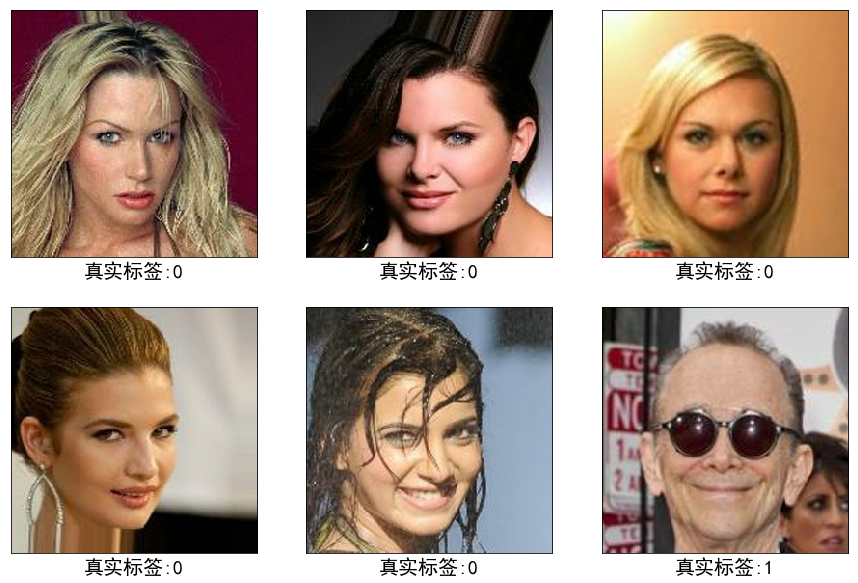

In [31]:
list_temp = list(range(1, 200+1))
list_view = random.sample(list_temp,10)
X_plot = x_test.reshape(200,256,256,3)
temp = 0
plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_plot[list_view[temp]])
    plt.xlabel('真实标签:{}'.format(y_test[list_view[temp]]),fontsize=20)
    temp += 1

## 自己查阅资料后编写的朴素贝叶斯方法

In [7]:
class MyGuassianNB():  # 参考自CSDN
        
    def fit(self,X_train, y_train):
        self.min_std = 0.00000001
        self.nclass = np.unique(y_train).shape[0]
        self.class_labels = np.unique(y_train)
        self.nfeature = X_train.shape[1]
        self.means = np.zeros((self.nclass,self.nfeature))
        self.stds = np.zeros((self.nclass,self.nfeature))
        self.log_py = np.zeros(self.nclass)
        for i in range(self.nclass):
            mask = [l==self.class_labels[i] for l in y_train]
            self.means[i] = np.nanmean(X_train[mask],axis=0)
            # 为了避免除以0，添加一个最小标准偏差
            self.stds[i] = np.clip(np.nanstd(X_train[mask],axis=0),self.min_std,None)
            # 计算 p(y=i) 概率
            self.log_py[i] = np.log(np.sum(mask)/len(y_train))
    
    def predict(self,X_test):
        samples = X_test.shape[0]
        log_py_on_x = np.zeros((samples,self.nclass))
        for i in range(self.nclass):
            log_py_on_x[:,i] = self.log_py[i] + np.nansum(np.log(norm.pdf(X_test,self.means[i],self.stds[i])),axis=1)
        label = self.class_labels[np.argmax(log_py_on_x, axis=1)]
        return label    
        
    
    def score(self,X_test, y_test):
        y_predict = self.predict(X_test)
        return (y_predict == y_test).mean()     

In [34]:
mynb = MyGuassianNB()
start = datetime.datetime.now()
mynb.fit(x_train, y_train)
end = datetime.datetime.now()
start1 = datetime.datetime.now()
y_prednb_train_my = mynb.predict(x_train)
y_prednb_test_my = mynb.predict(x_test)
end1 = datetime.datetime.now()
print('使用自己写的朴素贝叶斯方法训练所花总时间为' + str((end - start).total_seconds()) + '秒')
print('使用自己写的朴素贝叶斯方法测试所花总时间为' + str((end1 - start1).total_seconds()) + '秒')

使用自己写的朴素贝叶斯方法训练所花总时间为3.121304秒
使用自己写的朴素贝叶斯方法测试所花总时间为59.784327秒


In [9]:
print('使用自己写的朴素贝叶斯方法得到的训练集准确率为：' + str(mynb.score(x_train, y_train)))
print('使用自己写的朴素贝叶斯方法得到的测试集准确率为：' + str(mynb.score(x_test, y_test)))

使用自己朴素贝叶斯方法得到的训练集准确率为：0.6875
使用自己朴素贝叶斯方法得到的测试集准确率为：0.665


## 与调用Sklean库执行朴素贝叶斯的结果进行比较

In [35]:
nb = GaussianNB()
start = datetime.datetime.now()
nb = nb.fit(x_train, y_train)
end = datetime.datetime.now()
start1 = datetime.datetime.now()
y_prednb_train = nb.predict(x_train)
y_prednb_test = nb.predict(x_test)
end1 = datetime.datetime.now()
print('调用sklearn库训练所花时间为' + str((end - start).total_seconds()) + '秒')
print('调用sklearn库测试所花时间为' + str((end1 - start1).total_seconds()) + '秒')

调用sklearn库训练所花时间为3.747827秒
调用sklearn库测试所花时间为6.64716秒


In [11]:
print('调用sklean库得到的训练集准确率为：' + str(nb.score(x_train, y_train)))
print('调用sklean库得到的测试集准确率为：' + str(nb.score(x_test, y_test)))

调用sklean库得到的训练集准确率为：0.6875
调用sklean库得到的测试集准确率为：0.665


## 比较预测集的真实情况和预测情况

In [39]:
print('\n序号 \t 实际标签 \t 预测标签')
print('----\t-------------\t-----------------')
for index in range(1,len(y_test)+1):
    print(index, '\t\t',y_test[index-1], '\t\t', y_prednb_test_my[index-1])


序号 	 实际标签 	 预测标签
----	-------------	-----------------
1 		 0 		 1
2 		 0 		 0
3 		 0 		 0
4 		 0 		 0
5 		 0 		 0
6 		 0 		 1
7 		 0 		 1
8 		 0 		 0
9 		 0 		 1
10 		 0 		 0
11 		 0 		 0
12 		 0 		 1
13 		 0 		 1
14 		 0 		 1
15 		 0 		 0
16 		 0 		 1
17 		 0 		 0
18 		 0 		 1
19 		 0 		 1
20 		 0 		 0
21 		 0 		 0
22 		 0 		 0
23 		 0 		 0
24 		 0 		 0
25 		 0 		 0
26 		 0 		 1
27 		 0 		 0
28 		 0 		 0
29 		 0 		 1
30 		 0 		 0
31 		 0 		 1
32 		 0 		 0
33 		 0 		 0
34 		 0 		 0
35 		 0 		 0
36 		 0 		 1
37 		 0 		 0
38 		 0 		 0
39 		 0 		 0
40 		 0 		 0
41 		 0 		 1
42 		 0 		 0
43 		 0 		 0
44 		 0 		 1
45 		 0 		 0
46 		 0 		 0
47 		 0 		 0
48 		 0 		 0
49 		 0 		 1
50 		 0 		 1
51 		 0 		 0
52 		 0 		 0
53 		 0 		 0
54 		 0 		 1
55 		 0 		 0
56 		 0 		 0
57 		 0 		 0
58 		 0 		 1
59 		 0 		 1
60 		 0 		 0
61 		 0 		 0
62 		 0 		 1
63 		 0 		 1
64 		 0 		 1
65 		 0 		 1
66 		 0 		 0
67 		 0 		 0
68 		 0 		 0
69 		 0 		 0
70 		 0 		 0
71 		 0 		 0
72 		 0 		 1
73 		 0 		 0
74 		

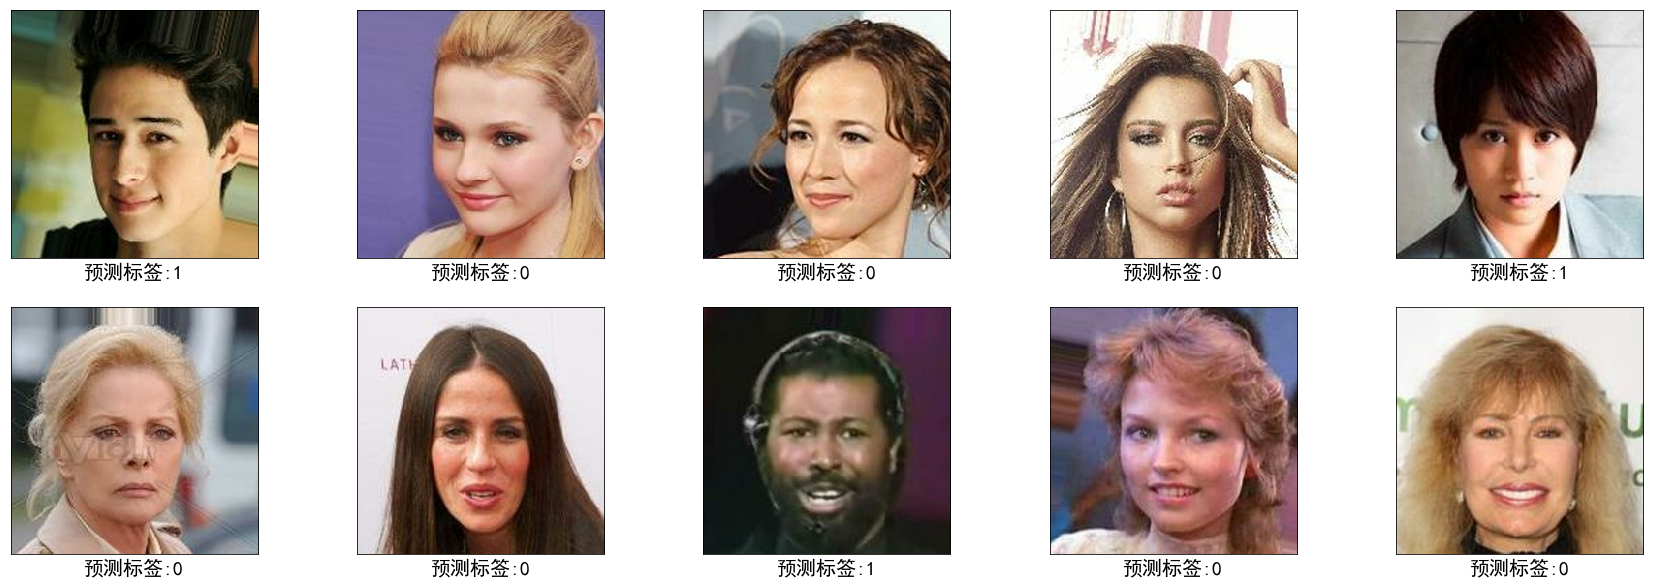

In [13]:
list_temp = list(range(1, 200+1))
list_view = random.sample(list_temp,10)
X_plot = x_test.reshape(200,256,256,3)
temp = 0
plt.figure(figsize=(30,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_plot[list_view[temp]])
    plt.xlabel('预测标签:{}'.format(y_prednb_test[list_view[temp]]),fontsize=20)
    temp += 1

In [37]:
confusion_matrix(y_test, y_prednb_test_my)

array([[66, 34],
       [33, 67]], dtype=int64)